# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [109]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [110]:
DATA_FOLDER = 'Data/'

POLICY_DATASET = DATA_FOLDER+"data.tsv.gz"
FONTS_DATASET = DATA_FOLDER+"fonts.csv"

policy = pd.read_csv(POLICY_DATASET, sep='\t', on_bad_lines='warn')
policy.head(10)

b'Skipping line 2142: expected 11 fields, saw 27\n'


,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1
5,Sign Top,6,147738,167895,125820.0,164688.0,NaN,NaN,NaN,NaN,2
6,Sign Bottom,7,18780,49811,45402.0,54824.0,NaN,NaN,NaN,NaN,2
7,Sign Top,8,41930,80323,181416.0,229852.0,NaN,NaN,NaN,NaN,2
8,Sign Top,9,28993,63707,13291.0,28165.0,NaN,NaN,NaN,NaN,2
9,Sign Bottom,10,78382,127817,NaN,NaN,NaN,NaN,NaN,NaN,1


In [111]:
# this will be used later and is placed here because rows
#  are removed from the policy dataframe in later tasks
original_length = len(policy.id)

### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

**2.1)**

In [112]:
print('Is the identifier unique?', policy.id.is_unique)
print('Number of duplicates:', np.sum(policy.duplicated(subset='id',keep='first'))) # there are 9 duplicated
policy.iloc[12:15]

Is the identifier unique? False
Number of duplicates: 9


,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
12,Sign Bottom,13,93231,98047,NaN,NaN,NaN,NaN,NaN,NaN,1
13,Sign Bottom,14,83443,105094,NaN,NaN,NaN,NaN,NaN,NaN,1
14,Sign Bottom,14,83443,105094,NaN,NaN,NaN,NaN,NaN,NaN,1


In [113]:
policy.drop_duplicates(subset='id',keep='first',inplace=True)
policy.iloc[12:15]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
12,Sign Bottom,13,93231,98047,NaN,NaN,NaN,NaN,NaN,NaN,1
13,Sign Bottom,14,83443,105094,NaN,NaN,NaN,NaN,NaN,NaN,1
15,Sign Bottom,15,22008,26486,NaN,NaN,NaN,NaN,NaN,NaN,1


We see above that the duplicates in row 13 and 14 has been removed and the first datapoint was kept (row 13)

In [114]:
# sanity check 
print('The raw dataset contained {:2} rows and the one free from duplicates has now {:2} rows'.format(original_length,len(policy.id)))

The raw dataset contained 13497 rows and the one free from duplicates has now 13488 rows


**2.2)**

In [115]:
nb_moto_baseline = policy[["baseline_motorcycle1", "baseline_motorcycle2", "baseline_motorcycle3", "baseline_motorcycle4"]].notnull().sum(axis=1)
nb_moto_update = policy[["update_motorcycle1", "update_motorcycle2", "update_motorcycle3", "update_motorcycle4"]].notnull().sum(axis=1)

print('Is the number of declared motorcycles consistent between the baseline and the updated contract?', all(nb_moto_baseline == nb_moto_update))

print('Number of policies having a wrong number of stated motorcycles:', sum(nb_moto_baseline != policy["motorcycle_count"])) # there are 0 rows
print('No filtering is needed')

Is the number of declared motorcycles consistent between the baseline and the updated contract? True
Number of policies having a wrong number of stated motorcycles: 0
No filtering is needed


**2.3)**

In [116]:
# The means of the kilometrage for the first motorcycle are much bigger than their respective median (10^14 >> 10^4)
# The ratio of the two values higlight the difference for motorcycle 1
policy_kilometrages=policy[["baseline_motorcycle1","update_motorcycle1", "baseline_motorcycle2", "update_motorcycle2", "baseline_motorcycle3", "update_motorcycle3","baseline_motorcycle4","update_motorcycle4"]]

policy_desc = policy_kilometrages.describe()
policy_desc.loc[["mean", "50%"]]

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,7.413998e+14,7.413998e+14,67325.967422,92277.633144,67657.320282,92849.408771,67827.97546,93374.279141
50%,5.634150e+04,8.239750e+04,56157.500000,82061.000000,58821.000000,85645.000000,68181.00000,93387.500000


In [117]:
ratios = policy_desc.loc['mean'] / policy_desc.loc['50%']
print('The ratio between the mean and median for baseline and updated motorcycle kilometrages, {:e} and {:e} are not plausible'.format(ratios.baseline_motorcycle1,ratios.update_motorcycle1))

The ratio between the mean and median for baseline and updated motorcycle kilometrages, 1.315903e+10 and 8.997843e+09 are not plausible


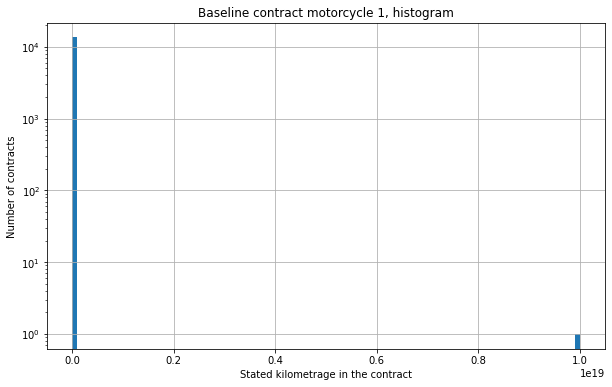

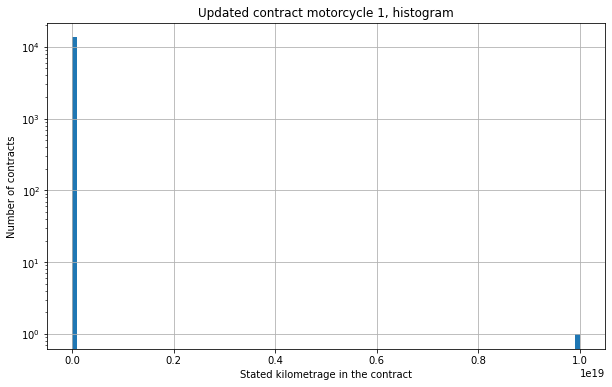

In [118]:
# Visualizing the data
# There seems to be at least one outlier in the data for both the baseline and the updated contract
policy['baseline_motorcycle1'].hist(bins = 100, log=True, figsize=(10, 6))
plt.xlabel('Stated kilometrage in the contract')
plt.ylabel('Number of contracts')
plt.title('Baseline contract motorcycle 1, histogram');
plt.show()

policy['update_motorcycle1'].hist(bins = 100, log=True, figsize=(10, 6))
plt.xlabel('Stated kilometrage in the contract')
plt.ylabel('Number of contracts')
plt.title('Updated contract motorcycle 1, histogram');
plt.show()

In [119]:
# the index of the outlier
policy["baseline_motorcycle1"].idxmax()

13228

In [120]:
# Removing the outlier data points
policy.drop(policy["baseline_motorcycle1"].idxmax(), inplace=True)
policy.drop(policy["update_motorcycle1"].idxmax(), inplace=True)

policy_kilometrages=policy[["baseline_motorcycle1","update_motorcycle1", "baseline_motorcycle2", "update_motorcycle2", "baseline_motorcycle3", "update_motorcycle3","baseline_motorcycle4","update_motorcycle4"]]

# The means and the median are now of the same magnitude
policy_desc = policy_kilometrages.describe().loc[["mean", "50%"]]
policy_desc.head()

,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4
mean,67345.119457,92275.012012,67326.871436,92276.41739,67657.320282,92849.408771,67827.97546,93374.279141
50%,56341.500000,82382.000000,56157.000000,82056.00000,58821.000000,85645.000000,68181.00000,93387.500000


In [121]:
# printing the ratios between mean and std after removing the outliers
policy_desc.loc['mean'] / policy_desc.loc['50%']

baseline_motorcycle1    1.195302
update_motorcycle1      1.120087
baseline_motorcycle2    1.198904
update_motorcycle2      1.124554
baseline_motorcycle3    1.150224
update_motorcycle3      1.084119
baseline_motorcycle4    0.994822
update_motorcycle4      0.999858
dtype: float64

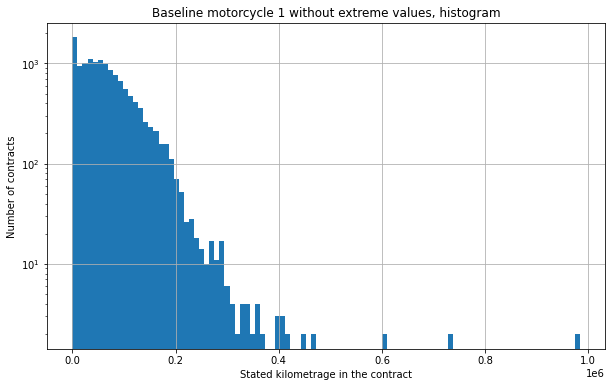

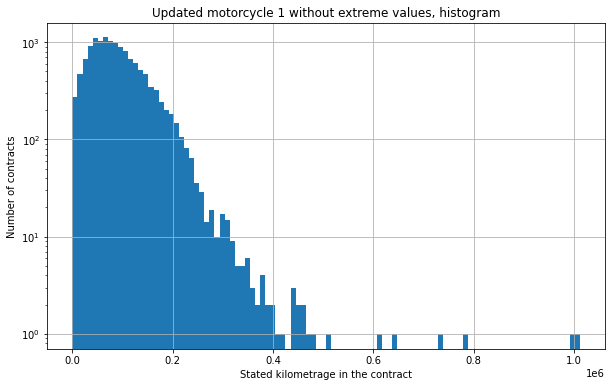

In [122]:
# Visualizing the data without the outliers
# The entire distributions stands now in the two histograms
policy['baseline_motorcycle1'].hist(bins = 100, log=True, figsize=(10, 6))
plt.xlabel('Stated kilometrage in the contract')
plt.ylabel('Number of contracts')
plt.title('Baseline motorcycle 1 without extreme values, histogram');
plt.show()

policy['update_motorcycle1'].hist(bins = 100, log=True, figsize=(10, 6))
plt.xlabel('Stated kilometrage in the contract')
plt.ylabel('Number of contracts')
plt.title('Updated motorcycle 1 without extreme values, histogram');
plt.show()

**2.4)** **Discuss Answer** :  It would be better to summarize with the median because it is more robust to outliers, the mean varies more with regard to outlier compared to the median which would change of only one sample maximum if an outlier was introduced.

### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

**3.1)**

In [123]:
# 1.Create additional columns
policy['baseline_average']=policy[['baseline_motorcycle1','baseline_motorcycle2','baseline_motorcycle3','baseline_motorcycle4']].mean(axis=1)
policy['update_average']=policy[['update_motorcycle1','update_motorcycle2','update_motorcycle3','update_motorcycle4']].mean(axis=1)
policy['diff_average']=policy['update_average']-policy['baseline_average']
policy.head(10)

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0
5,Sign Top,6,147738,167895,125820.0,164688.0,NaN,NaN,NaN,NaN,2,136779.0,166291.5,29512.5
6,Sign Bottom,7,18780,49811,45402.0,54824.0,NaN,NaN,NaN,NaN,2,32091.0,52317.5,20226.5
7,Sign Top,8,41930,80323,181416.0,229852.0,NaN,NaN,NaN,NaN,2,111673.0,155087.5,43414.5
8,Sign Top,9,28993,63707,13291.0,28165.0,NaN,NaN,NaN,NaN,2,21142.0,45936.0,24794.0
9,Sign Bottom,10,78382,127817,NaN,NaN,NaN,NaN,NaN,NaN,1,78382.0,127817.0,49435.0


**3.2)** **Discuss**  

A possibility would be to take the median value of the baseline kilometrages and substract it to the median value of the updated kilometrages. This value would be robust to outliers ( we only removed the extreme outliers). For instance if there was an outlier in a policy the  average value would be  influenced by it and this could lead to wrong conclusions during the comparison.

**3.3)**

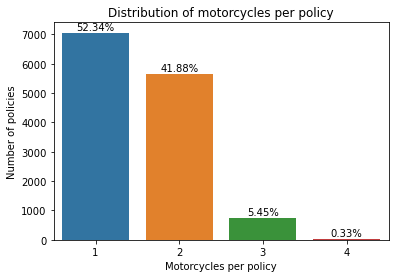

In [124]:
# 3. Distribution of motorcycles per policy
# How many policies have 1, 2, 3 or 4 motorcycles 
ax = sns.countplot(x=policy['motorcycle_count'])
plt.title('Distribution of motorcycles per policy')
plt.xlabel('Motorcycles per policy')
plt.ylabel('Number of policies')

# add the percentages to the plot
percentage = policy['motorcycle_count'].value_counts(normalize=True).mul(100) #this is a dataframe
i = 1
for p in ax.patches:
    per = '{:.2f}%\n'.format(percentage[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(per, (x,y), ha='center', va='center')
    i = i+1
    

To visualise the distribution more thoroughly we decided to add a pie chart since it is easier to see how the data is split. Nevertheless the bar plot gives additional information since it indicates the number of policies.

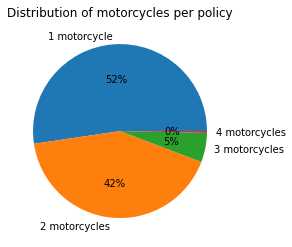

In [125]:
plt.pie(percentage,labels=['1 motorcycle','2 motorcycles','3 motorcycles','4 motorcycles'],autopct='%.0f%%')
plt.title('Distribution of motorcycles per policy')
plt.show()

**3.4)**

In [126]:
#4 Mean and standard deviation of updated average kilometrage for each policy 
print("The mean and standar deviation of the updated average kilometrage for each policy:")
print(policy['update_average'].describe().loc[['mean','std']].to_string())

The mean and standar deviation of the updated average kilometrage for each policy:
mean    92166.980090
std     52212.864277


**3.5)**

In [127]:
#5 mean and standard deviation kilometrage for updated contracts per motorcycle (for policies with 4 motorcycles)
pol_4_mc = policy[policy['motorcycle_count']==4]

# pooling the motorcycle kilometrages into one series
pooled_mc=pol_4_mc[['update_motorcycle1','update_motorcycle2','update_motorcycle3','update_motorcycle4']].stack()
pooled_mc.describe().loc[['mean','std']]

print('The average and standard deviation of the kilometrage for all the motorcycles is :')
print(pooled_mc.describe().loc[['mean']].to_string())

print(pooled_mc.describe().loc[['std']].to_string())

The average and standard deviation of the kilometrage for all the motorcycles is :
mean    113443.863636
std    83148.461506


**3.6)**

In theory if every motorycle kilometrage followed the same distribution we should have the same mean and standard deviation for both methods of calculation, but it is possible that each motorcycle (1 to 4) follows a different distribution. For instance, maybe on average a customer uses their last insured motorycle more than their first one if it is more recent.  

Since the first method takes the average of averages, policies that only have one motorcycle have the same "weight" as policies that have 4 motorcycles. This might skew the average to be closer to what policies with single motorcycles have.

Additionally, when taking one datapoint per policy, if a customer was dishonest in his kilometrage measurements, and had 4 motorcycles, he will only contribute "once" to the global average. But if we take one data point per motorcycle, this customer will have 4 times more influence on the average since every motorcycle has the same "weight" in the average and std calculation

### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

**4.1)**

In [128]:
# 1. Mean and std of updated average kilometrage depending on signing condition
top_policy = policy[policy['condition']== 'Sign Top']['update_average']
bottom_policy = policy[policy['condition']== 'Sign Bottom']['update_average']
top_m_std = top_policy.describe().loc[['mean','std']]
bottom_m_std = bottom_policy.describe().loc[['mean','std']]
print('a)For policies where the signing was done at the bottom\n Mean is :{:2.2f}km with a standard deviation of {:2.2f}km\nb)For policies where the signing was done at the top\n Mean is :{:2.2f}km with standard deviation {:2.2f} km'.format(bottom_m_std[0],bottom_m_std[1],top_m_std[0],top_m_std[1]))

a)For policies where the signing was done at the bottom
 Mean is :98692.36km with a standard deviation of 51928.18km
b)For policies where the signing was done at the top
 Mean is :85794.62km with standard deviation 51704.29 km


Surprisingly, it seems that signing at the bottom "increases honesty".
Of course, that is meaningless since we didn't study the uncertainty of those estimates.
In addition, it is too early to know if those findings are in any way linked to customer dishonesty.

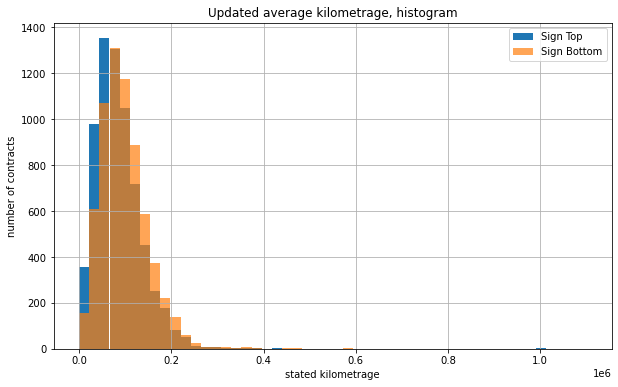

In [129]:
# 4.1. Plot of the kilometrage distributions
top_policy.hist(bins=50,label='Sign Top', figsize=(10, 6),range=[0, 1.1e6])

bottom_policy.hist(bins=50,label='Sign Bottom', figsize=(10, 6),range=[0, 1.1e6],alpha=0.7)

plt.title('Updated average kilometrage, histogram')
plt.xlabel('stated kilometrage')
plt.ylabel('number of contracts')
plt.legend()
plt.show()

**4.2)**

In [130]:
#4.2 Statistical difference between sests of data 
print('T-statistic is {:2f} and pvalue is {:2e}'.format(stats.ttest_ind(top_policy,bottom_policy)[0],stats.ttest_ind(top_policy,bottom_policy)[1]))

# The test quantifies the difference in the arithmetic means of two sets of data
# The low p value is an evidence against the null hypoyhesis of same population
print('The p-value indicates that the means are statistically different.')

T-statistic is -14.452368 and pvalue is 5.435352e-47
The p-value indicates that the means are statistically different.


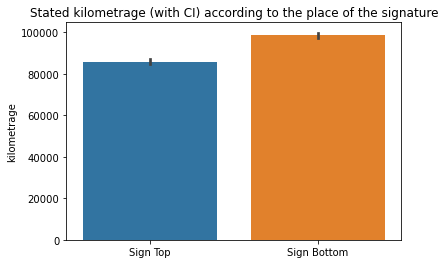

In [131]:
# Using confidence intervals on the two means,
# we can also conclude that signing at the top or at the bottom
# may have a significant impact on social behavior
ax = sns.barplot(x="condition", y="update_average", data=policy)
plt.ylabel('kilometrage')
plt.xlabel('')
plt.title('Stated kilometrage (with CI) according to the place of the signature')
plt.show()

**4.3 )** **Discuss** Our findings can not prove an increase of honesty when customers are signing at the top of the contracts. According to the confidence intervals displayed above, we found that the stated kilometrage in the _sign Top_ contracts are significantly lower in average than for the _sign Bottom_ contracts. In addition, the Student test has shown a significant difference between the two means which has been estimated to 10<sup>3</sup> km in order of magnitude according to question 1. 

What is observed here is opposite to the inital hypothesis/intuition from the hw material ( _'it could be that signing at the beginning rather than at the end of the document would decrease dishonesty'_ ) since it would be expected that an inscrease in dishonesty would result in a smaller kilometrage mean value.

**4.4 )** **Discuss** 
We don't expect any differences between the averages values for the baseline contract, because no intervention was performed, everyone had the same contract to sign.

**4.5)**

In [132]:
# 4.5. Mean and std of updated average kilometrage depending on signing condition
top_policy_bas = policy[policy['condition']== 'Sign Top']['baseline_average']
bottom_policy_bas = policy[policy['condition']== 'Sign Bottom']['baseline_average']
top_m_std_bas = top_policy_bas.describe().loc[['mean','std']]
bottom_m_std_bas = bottom_policy_bas.describe().loc[['mean','std']]
print('For baseline contracts\na)For policies where the signing was done at the bottom\n Mean is :{:2.2f}km with a standard deviation of {:2.2f}km\nb)For policies where the signing was done at the top\n Mean is :{:2.2f}km with standard deviation {:2.2f} km'.format(bottom_m_std_bas[0],bottom_m_std_bas[1],top_m_std_bas[0],top_m_std_bas[1]))

For baseline contracts
a)For policies where the signing was done at the bottom
 Mean is :75020.75km with a standard deviation of 50256.59km
b)For policies where the signing was done at the top
 Mean is :59696.23km with standard deviation 49956.32 km


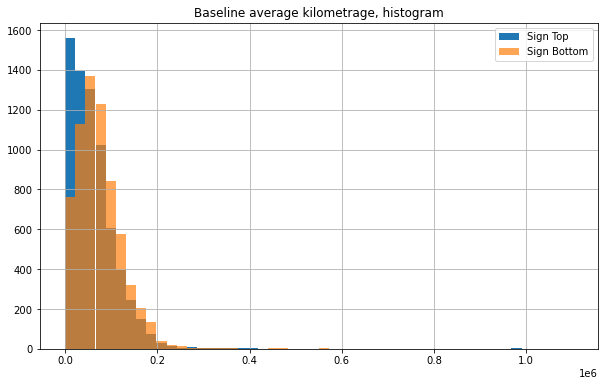

In [133]:
# 4.5 Plot of the distribution
top_policy_bas.hist(bins=50,label='Sign Top', figsize=(10, 6),range=[0, 1.1e6])
bottom_policy_bas.hist(bins=50,label='Sign Bottom', figsize=(10, 6),range=[0, 1.1e6],alpha=0.7)
plt.title('Baseline average kilometrage, histogram')
plt.legend()
plt.show()

In [134]:
#4.5. Statistical difference between sests of data 
print('T-statistic is {:2.2f} and pvalue is {:2.2e}'.format(stats.ttest_ind(top_policy_bas,bottom_policy_bas)[0],stats.ttest_ind(top_policy_bas,bottom_policy_bas)[1]))

#The test quantifies the difference in the arithmetic means of two sets of data
#The low p value is an evidence against the null hypoyhesis of same population
print('The p-value indicates that the means are statistically different.')

T-statistic is -17.76 and pvalue is 9.33e-70
The p-value indicates that the means are statistically different.


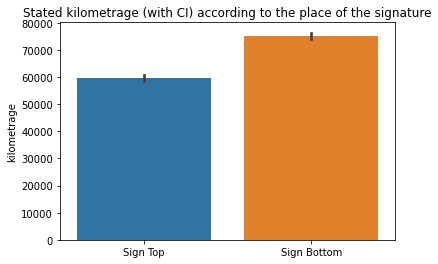

In [135]:
# Using confidence intervals on the two means, we can
# also conclude for the baseline contract that signing
# at the top or at the bottom may have a significant
# impact on customer's honesty
ax = sns.barplot(x="condition", y="baseline_average", data=policy)
plt.ylabel('kilometrage')
plt.xlabel('')
plt.title('Stated kilometrage (with CI) according to the place of the signature')
plt.show()

**4.6)** Surprinsingly, there is a statistically significant difference between the two subgroups concernging their stated kilometrage in the baseline contract (see the small length of the confidence intervals and the gap between the two bars on the above plot). Indeed, the T-statistic value is -17.76 and the p-value is 9.33$\cdot$10<sup>-70</sup>.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

**5.1)**

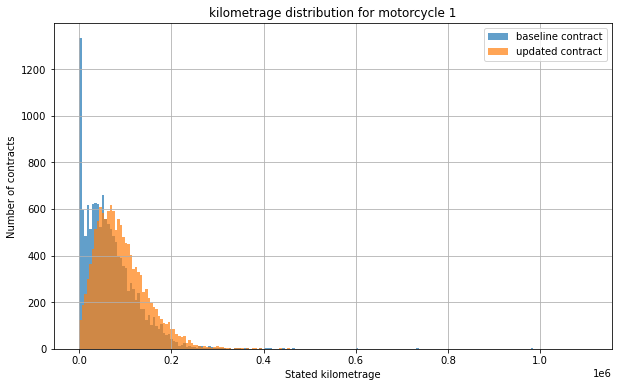

In [136]:
# First motorcycle kilometrage distribution for baseline and updated
bin_num=200
policy['baseline_motorcycle1'].hist(bins=bin_num, alpha=0.7, figsize=(10, 6),range=[0, 1.1e6])
policy['update_motorcycle1'].hist(bins=bin_num, alpha=0.7, figsize=(10, 6),range=[0, 1.1e6])
plt.xlabel('Stated kilometrage')
plt.ylabel('Number of contracts')
plt.legend(['baseline contract', 'updated contract'])
plt.title('kilometrage distribution for motorcycle 1')
plt.show()

**5.2)**

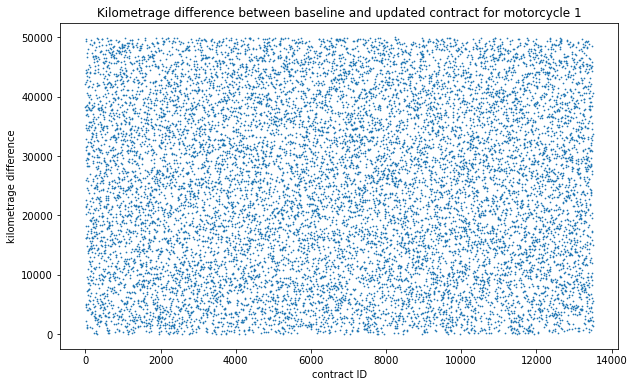

In [137]:
#5.2 Difference between baseline and updated contract for motorcycle 1
diff_m1 = policy['update_motorcycle1'] - policy['baseline_motorcycle1']
pd_diff = diff_m1.to_frame()
pd_diff.reset_index(inplace=True)
pd_diff.columns = ['index','difference']
pd_diff.plot(kind='scatter',x='index',y='difference',s=0.5, figsize=(10, 6))
plt.xlabel('contract ID')
plt.ylabel('kilometrage difference')
plt.title('Kilometrage difference between baseline and updated contract for motorcycle 1')
plt.show()

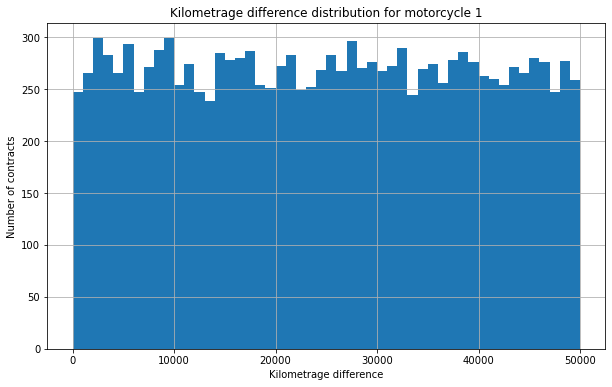

In [138]:
pd_diff['difference'].hist(bins=50, figsize=(10, 6))
plt.xlabel('Kilometrage difference')
plt.ylabel('Number of contracts')
plt.title('Kilometrage difference distribution for motorcycle 1')
plt.show()

**5.3)**

**Discuss** 

The updated contract distribution is shifted towards higher values of kilometrages, as expected.

However the distribution shape is extremely similar to the initial one, (except for the peak on the extreme left) which is unexpected, as we could imagine that the updated kilometers would vary depending on the driving trends. Instead we should be seeing a more stretched version of the baseline contract for the updated contract (those who drive a lot gain even more distance on the others, those who drive less are even further behind).


The kilometrage difference distribution is nearly constant. This is odd because we can expect a more normalized distribution ( a normal distribution or multimodal normal distribution) , where a few people drive only a few kilometers between two contracts, few people drive a lot, and the majority of people drive a similar amount. Obviously this could be more complicated than this simple normalized view however a flat distribution is far from this expectation.

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

**6.1)**

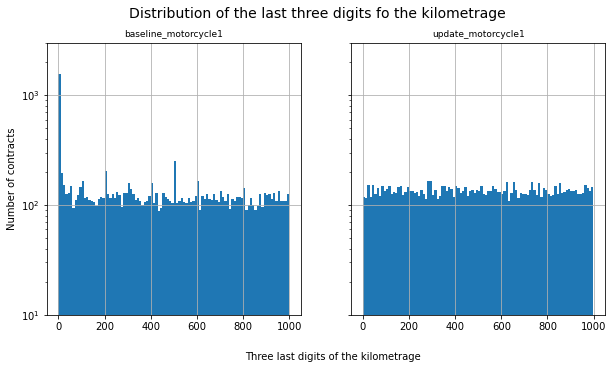

In [139]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5),sharex=True,sharey=True)

fig.suptitle('Distribution of the last three digits fo the kilometrage', fontsize=14)

policy['baseline_motorcycle1'].apply(lambda d : (d %1000)).hist(bins = 100,log=True,ax=axes[0])
axes[0].set_title('baseline_motorcycle1', fontsize=9)
axes[0].set_ylim((1e1,3e3))

policy['update_motorcycle1'].apply(lambda d : (d %1000)).hist(bins = 100,log=True,ax=axes[1])
axes[1].set_title('update_motorcycle1', fontsize=9)
axes[1].set_ylim((1e1,3e3))

fig.text(0.4,0, 'Three last digits of the kilometrage')
axes[0].set_ylabel('Number of contracts')
plt.show()

**6.2)** On the baseline contract there is an increased amount of contracts that have a kilometrage with the last three digits equal or close to 000 and 500. The increased amount doesn't appear in the updated contracts.

Additionally we can see peaks at some multiples of 100 in the baseline_motorcycle1 kilometrages distribution. These peaks are less visible in the update_motorcycles1 kilometrage values. (Note: 000 corresponds to 1000,2000,3000, etc)

**6.3)**
When entering the kilometrage of their motobikes some customers might have rounded to the closest thousand or hundredth because of _round number bias_. ( According to wikipedia : _"Round number bias is the psychological tendency to prefer round numbers over others"_ https://en.wikipedia.org/wiki/Round_number#Round_number_bias 

At this point we can't explain why we can't find this in the second set of data, we can hypothesize that the updated kilometrage numbers have been entered in a different way than in the baseline contracts.

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

**7.1)**

In [140]:
fonts = pd.read_csv(FONTS_DATASET, sep=',', on_bad_lines='warn')
policy_w_fonts=pd.merge(policy,fonts) # pandas automatically merges on id column
policy_w_fonts.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average,font
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0,Helvetica
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5,Helvetica
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0,Helvetica
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0,Helvetica
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0,Arial


#### 7.2)

In [141]:
# number of rows with Helvetica, same for Arial
helvet_num=len(policy_w_fonts[policy_w_fonts['font']=='Helvetica'])
arial_num=len(policy_w_fonts[policy_w_fonts['font']=='Arial'])

print("Number of rows with the Helvetica font: {} ".format(helvet_num))
print("Number of rows with the Arial     font: {}".format(arial_num))

Number of rows with the Helvetica font: 6742 
Number of rows with the Arial     font: 6744


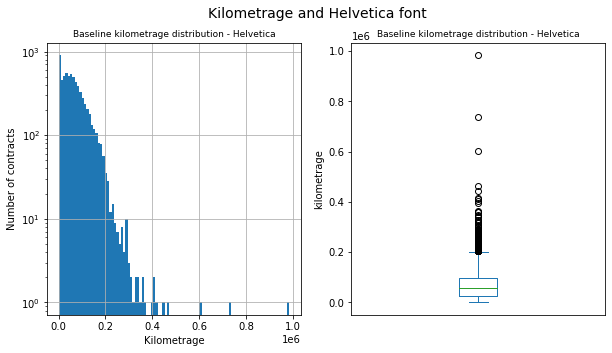

In [142]:
# baseline kilometers for rows with the Arial font and for rows with the Helvetica font 
# ( only the first motorcycle )

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

policy_w_fonts.loc[(policy_w_fonts['font']=='Helvetica'),'baseline_motorcycle1'].hist(bins = 100,log=True,ax=axes[0])

axes[0].set_title('Baseline kilometrage distribution - Helvetica', fontsize=9)
axes[0].set_xlabel('Kilometrage')
axes[0].set_ylabel('Number of contracts')

fig.suptitle('Kilometrage and Helvetica font', fontsize=14)

(policy_w_fonts.loc[(policy_w_fonts['font']=='Helvetica'),'baseline_motorcycle1']).plot.box(ax=axes[1])

axes[1].set_title('Baseline kilometrage distribution - Helvetica', fontsize=9)
axes[1].set_ylabel('kilometrage')

axes[1].set_xticks([])
plt.show()

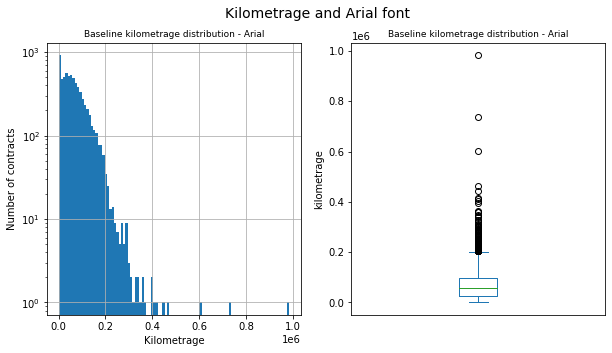

In [143]:
# baseline kilometers for rows with the Arial font and for rows with the Helvetica font 
# ( only the first motorcycle )

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

policy_w_fonts.loc[(policy_w_fonts['font']=='Arial'),'baseline_motorcycle1'].hist(bins = 100,log=True,ax=axes[0])

axes[0].set_title('Baseline kilometrage distribution - Arial', fontsize=9)
axes[0].set_xlabel('Kilometrage')
axes[0].set_ylabel('Number of contracts')

fig.suptitle('Kilometrage and Arial font', fontsize=14)

(policy_w_fonts.loc[(policy_w_fonts['font']=='Arial'),'baseline_motorcycle1']).plot.box(ax=axes[1])

axes[1].set_title('Baseline kilometrage distribution - Arial', fontsize=9)
axes[1].set_ylabel('kilometrage')

axes[1].set_xticks([])
plt.show()

**7.3)**

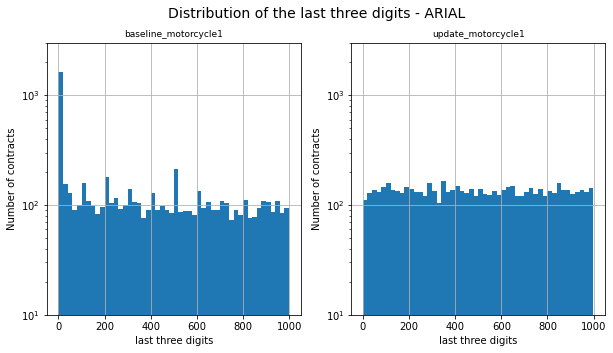

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

fig.suptitle('Distribution of the last three digits - ARIAL', fontsize=14)

policy_w_fonts.loc[(policy_w_fonts['font']=='Arial'),'baseline_motorcycle1'].apply(lambda d : (d %1000)).hist(bins = 50,log=True,ax=axes[0])
axes[0].set_title('baseline_motorcycle1', fontsize=9)
axes[0].set_ylim((1e1,3e3))
axes[0].set_xlabel('last three digits')
axes[0].set_ylabel('Number of contracts')

policy_w_fonts.loc[(policy_w_fonts['font']=='Helvetica'),'update_motorcycle1'].apply(lambda d : (d %1000)).hist(bins = 50,log=True,ax=axes[1])
axes[1].set_title('update_motorcycle1', fontsize=9)
axes[1].set_ylim((1e1,3e3))
axes[1].set_xlabel('last three digits')
axes[1].set_ylabel('Number of contracts')
plt.show()

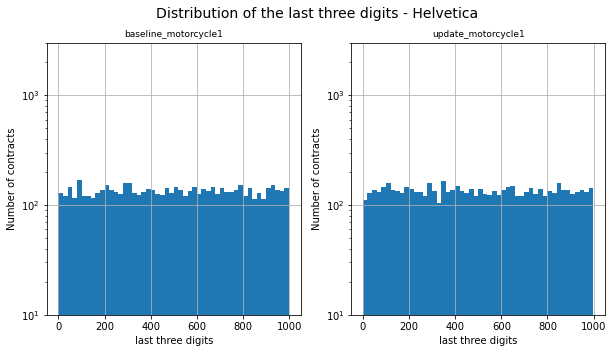

In [145]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

fig.suptitle('Distribution of the last three digits - Helvetica', fontsize=14)

policy_w_fonts.loc[(policy_w_fonts['font']=='Helvetica'),'baseline_motorcycle1'].apply(lambda d : (d %1000)).hist(bins = 50,log=True,ax=axes[0])
axes[0].set_title('baseline_motorcycle1', fontsize=9)
axes[0].set_ylim((1e1,3e3))
axes[0].set_xlabel('last three digits')
axes[0].set_ylabel('Number of contracts')


policy_w_fonts.loc[(policy_w_fonts['font']=='Helvetica'),'update_motorcycle1'].apply(lambda d : (d %1000)).hist(bins = 50,log=True,ax=axes[1])
axes[1].set_title('update_motorcycle1', fontsize=9)
axes[1].set_ylim((1e1,3e3))
axes[1].set_xlabel('last three digits')
axes[1].set_ylabel('Number of contracts')
plt.show()

**7.4 )**

Theses analyses show that the human _round number bias_ appears only in the Arial (baseline set). Indeed, when looking at the distribution of the last three numbers of the baseline kilometrages written in arial we can see that there are more kilometrages ending in 000 and some multipled of 100.

This peak does not appear in the updated kilometrages, and also does not appear in the baseline motorcyle kilometrage written in Helvetica. 

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.

People who were asked to sign at the bottom the next year seem to have behaved significantly different for the baseline contract from those who were asked to sign at the top. This is surprising since those two subgroups of people were designed arbitrarily and they both signed at the bottom the first year.
Between the baseline and updated contract, customers seem to have driven drastically different distances. Here, it would have been expected that the difference of stated kilometrage between the two contracts would have looked more like a normal distribution (or a multimodal normal distribution).
Also, there is no round number bias on all the Helvetica rows, it appears only in the baseline contracts written in Arial.

We believe that the data has been modified in the following way. The dataset is composed of an original part and a fabricated one. The original part is the baseline contract in Arial, as they show some signs of human creation (Histogram 7.3). Based on this subset of data, a set of updated contracts, in Arial, has been fabricated adding uniformly distributed values (scatter plot 5.2). To increase the dataset size, another set of data has been fabricated, with the Helvetica font, for both the baseline and the updated contracts. For the baseline contracts, they used the Arial baseline contracts and reproduced the same distribution (7.2), however as they artificially created this data the distribution was similar but the human traces (rounded numbers) were not reproduced. The fabrication of data lead to the almost constant distribution of the difference between updated and baseline kilometrages (Histogram on 5.2).

On account of the number of inconsistencies that we found in the dataset, we cannot confirm that signing at the top instead of signing at the bottom would increase the honesty of customers.